# 参考资料：
* http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
* http://pandas.pydata.org/pandas-docs/stable/reference/frame.html

* http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


__Series是list和有序dict的综合体，所以在开发过程中应该统一成Series来开发，减少list和dict的使用！！！__

**Series和DataFrame的底层都是基于numpy的ndarray实现的！**

* Series： One-dimensional ndarray with axis labels (including time series).
* DataFrame: 可以看做是共享Index的一组Series。从这个角度讲，Series和DataFrame的操作都是相同的。  
__对DataFrame操作相当于对一组Series进行批量操作。__

In [53]:
!pip freeze | grep pandas

pandas==0.24.2
pandas-datareader==0.7.0


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

# pd.set_option('display.max_rows', None)  # 显示所有行

# or
# pd.options.display.max_colwidth = 200
# pd.options.display.max_columns = 100

# ignore pandas's warnings 
# import warnings
# warnings.filterwarnings('ignore')

# pandas
## 文件读取

### read_excel

pd.read_excel(converters={'出险人客户号': str})

* 【header】默认header=0，即将文件中的0行作为列名和数据的开头，但有时候0行的数据是无关的，我们想跳过0行，让1行作为数据的开头，可以通过将header设置为1来实现。如果数据没有列名，则设置header=None
* 【usecols】根据列的位置或名字，如[0,1,2]或[‘a’, ‘b’, ‘c’]，选出特定的列。
* 【nrows】要导入的数据行数，在数据量很大、但只想导入其中一部分时使用。
* converters 指定某列读取时的类型

In [ ]:
# 指定相应的字段按照字符串类型读取
str_f = ['平台流水号', '保单管理机构', '保单号', \
         '被保人核心客户号', '保人归并客户号', '被保人归并客户号']

df = pd.read_excel('data_origin/理赔信息.xlsx', \
                   sheet_name='SQL Results', \
                   index_col=0, \
                   converters=dict(zip(str_f, [str]*len(str_f))))

### pd.read_parquet(path, engine='auto', columns=None, **kwargs)
1. columns   
parquet是列式存储，读取指定列，可以节约内存  
If not None, only these columns will be read from the file.

1. engine : {‘auto’, ‘pyarrow’, ‘fastparquet’}, default ‘auto’  
Parquet reader library to use. If ‘auto’, then the option ‘io.parquet.engine’ is used. If ‘auto’, then the first library to be installed is used.

In [12]:
# !pip install fastparquet
# !pip install python-snappy
!pip freeze | grep fastparquet

fastparquet==0.3.1


In [15]:
# centos 需要先 yum install snappy-devel
!pip freeze | grep python-snappy

python-snappy==0.5.4


In [ ]:
dfff.to_parquet()

## 分类变量

In [211]:
pd.Categorical([1, 2, 3, 1, 2, 3])

[1, 2, 3, 1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [212]:
pd.Categorical([1, 2, 3, 1, 2, 3], categories=[1, 2])

[1, 2, NaN, 1, 2, NaN]
Categories (2, int64): [1, 2]

In [213]:
pd.Categorical(['a','b','c','a','b','c'], ordered=True, categories=['c', 'a', 'b'])

[a, b, c, a, b, c]
Categories (3, object): [c < a < b]

## 索引操作

In [173]:
df = pd.DataFrame({'class': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C'],
                       'id': ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b'],
                       'value': [1, 2, 3, 4, 5, 6, 7, 8]}, index=list('abcdefgh'))
df

,class,id,value
a,A,a,1
b,A,b,2
c,A,c,3
d,B,a,4
e,B,b,5
f,B,c,6
g,C,a,7
h,C,b,8


### 重置索引set_index

In [138]:
df.set_index(keys=['class', 'id'])  # 等价于df.set_index(keys=['class', 'id'], drop=True)

value
class id       
A     a       1
      b       2
      c       3
B     a       4
      b       5
      c       6
C     a       7
      b       8

In [139]:
df.set_index(keys=['class', 'id'], append=True)

,,,value
,class,id,
a,A,a,1
b,A,b,2
c,A,c,3
d,B,a,4
e,B,b,5
f,B,c,6
g,C,a,7
h,C,b,8


### reindex

In [174]:
df

,class,id,value
a,A,a,1
b,A,b,2
c,A,c,3
d,B,a,4
e,B,b,5
f,B,c,6
g,C,a,7
h,C,b,8


In [175]:
new_index = list('eghijk')
df.reindex(new_index)

,class,id,value
e,B,b,5.0
g,C,a,7.0
h,C,b,8.0
i,NaN,NaN,NaN
j,NaN,NaN,NaN
k,NaN,NaN,NaN


In [142]:
df.reindex(new_index, fill_value=0)

,class,id,value
e,B,b,5
g,C,a,7
h,C,b,8
i,0,0,0
j,0,0,0
k,0,0,0


### reset_index
Reset the index of the DataFrame, and use the default one instead.
If the DataFrame has a MultiIndex, this method can remove one or more
levels.

In [144]:
df.reset_index()

,index,class,id,value
0,a,A,a,1
1,b,A,b,2
2,c,A,c,3
3,d,B,a,4
4,e,B,b,5
5,f,B,c,6
6,g,C,a,7
7,h,C,b,8


In [145]:
df.reset_index(drop=True)

,class,id,value
0,A,a,1
1,A,b,2
2,A,c,3
3,B,a,4
4,B,b,5
5,B,c,6
6,C,a,7
7,C,b,8


In [149]:
df = df.set_index(keys=['class', 'id'], drop=True)
df

value
class id       
A     a       1
      b       2
      c       3
B     a       4
      b       5
      c       6
C     a       7
      b       8

In [150]:
df.reset_index('class')

,class,value
id,,
a,A,1
b,A,2
c,A,3
a,B,4
b,B,5
c,B,6
a,C,7
b,C,8


### 层次化索引

#### dataframe多重索引操作

In [151]:
df

value
class id       
A     a       1
      b       2
      c       3
B     a       4
      b       5
      c       6
C     a       7
      b       8

In [163]:
df.swaplevel('class', 'id')

,,value
id,class,
a,A,1
b,A,2
c,A,3
a,B,4
b,B,5
c,B,6
a,C,7
b,C,8


In [165]:
df.sort_index(level=0)

value
class id       
A     a       1
      b       2
      c       3
B     a       4
      b       5
      c       6
C     a       7
      b       8

In [164]:
df.sort_index(level=1)

,,value
class,id,
A,a,1
B,a,4
C,a,7
A,b,2
B,b,5
C,b,8
A,c,3
B,c,6


In [166]:
df.sum(level=1)

,value
id,
a,12
b,15
c,9


In [152]:
df.loc['A']

,value
id,
a,1
b,2
c,3


In [153]:
df.loc[('A',slice(None))]

,value
id,
a,1
b,2
c,3


In [154]:
df.loc[('A',slice(None)), :]

value
class id       
A     a       1
      b       2
      c       3

In [155]:
df.loc[('A',:),:]

SyntaxError: invalid syntax (<ipython-input-155-f98afffe4bdd>, line 1)

In [156]:
df.loc[(slice(None),'a'), :]

,,value
class,id,
A,a,1
B,a,4
C,a,7


#### Series层次化索引操作

In [158]:
s1 = df['value']
s1

class  id
A      a     1
       b     2
       c     3
B      a     4
       b     5
       c     6
C      a     7
       b     8
Name: value, dtype: int64

In [159]:
s1['A']

id
a    1
b    2
c    3
Name: value, dtype: int64

In [160]:
s1[:, 'a']

class
A    1
B    4
C    7
Name: value, dtype: int64

#### Series.unstack()

In [161]:
dft = s1.unstack()
dft

id,a,b,c
class,,,
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,NaN


In [162]:
s1.unstack(level=0)

class,A,B,C
id,,,
a,1.0,4.0,7.0
b,2.0,5.0,8.0
c,3.0,6.0,NaN


#### dataframe.stack()

In [49]:
dft.stack()

class  id
A      a     1.0
       b     2.0
       c     3.0
B      a     4.0
       b     5.0
       c     6.0
C      a     7.0
       b     8.0
dtype: float64

#### 排序

In [51]:
s1.sort_index(level='id')

class  id
A      a     1
B      a     4
C      a     7
A      b     2
B      b     5
C      b     8
A      c     3
B      c     6
Name: value, dtype: int64

# Object Creation

## Series生成

In [2]:
s = pd.Series()

In [5]:
s.loc[0] = 1.1
s.loc[1] = 2
s.loc['name'] = 'ian'
s

0       1.1
1         2
name    ian
dtype: object

### 基于list

In [10]:
s = pd.Series([1.1, 2, 3, None, 4, 5, 4, '2010-04-14'])
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

### Series转换为list

In [8]:
s.to_list()

[1.1, 2, 3, None, 4, 5, 4, '2010-04-14']

In [33]:
s.tolist()

[1.1, 2, 3, None, 4, 5, 4, '2010-04-14']

### 基于1D ndarray

In [10]:
s = pd.Series(np.arange(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

### Series转换为ndarray

In [11]:
s.values

array([0, 1, 2, 3, 4])

### 基于dict

In [2]:
d = {'s': 0, 'b': 0, 'm': 0, 'e': 0}
s = pd.Series(d)
s

s    0
b    0
m    0
e    0
dtype: int64

### Series转换为dict

In [13]:
s.to_dict()

{'s': 0, 'b': 0, 'm': 0, 'e': 0}

### Series转换为DataFrame

In [3]:
s.to_frame()

,0
s,0
b,0
m,0
e,0


In [6]:
s.to_frame('aaa')

,aaa
s,0
b,0
m,0
e,0


In [4]:
s.name = 'tt'

In [5]:
s.to_frame()

,tt
s,0
b,0
m,0
e,0


### Series属性

In [11]:
s

s    0
b    0
m    0
e    0
dtype: int64

In [42]:
s.dtype

dtype('O')

In [43]:
s.dtypes

dtype('O')

In [44]:
s.ndim

1

In [45]:
s.shape

(8,)

In [47]:
s.size

8

In [49]:
s.count()  # Return number of non-NA/null observations in the Series.

7

In [46]:
s.name

In [52]:
s.empty

False

## DataFrame

### 基于list

In [78]:
df = pd.DataFrame([[0, 0], [0, 1], [1, 1]], columns=['x', 'y'])
df

,x,y
0,0,0
1,0,1
2,1,1


In [79]:
df.loc[:, 'z']=[1,1,1]

In [80]:
df

,x,y,z
0,0,0,1
1,0,1,1
2,1,1,1


In [77]:
df.index[:1]

RangeIndex(start=0, stop=1, step=1)

In [76]:
df.sample(2)

,x,y
2,1,1
0,0,0


### df转换为list

In [26]:
df.values.tolist()

[[0, 0], [0, 1], [1, 1]]

### 基于2D ndarray

In [5]:
dfff = pd.DataFrame(np.random.randn(6, 4), index=list('一二三四五六'), columns=list('ABCD'))
dfff

,A,B,C,D
一,2.283939,0.249236,0.225894,0.791863
二,-2.102496,-0.149481,-0.649661,-3.044492
三,0.582778,-0.498411,0.161483,-0.199120
四,-2.776477,0.184429,0.817764,-1.680994
五,1.025523,-1.118512,-0.440682,-0.355193
六,0.556336,-0.561824,1.996132,-1.781205


In [28]:
dfff.sample(dfff.shape[0])

,A,B,C,D
一,-2.492687,-0.841388,0.786221,-0.548703
五,0.099302,0.090680,0.469243,0.074084
六,1.778071,0.330897,-0.241265,-0.229952
四,1.110394,-1.655641,-0.285068,0.103123
三,-0.306999,-0.000555,-1.392337,-1.562711
二,-1.943518,0.958283,-0.024015,-0.169730


In [31]:
7//4

1

In [32]:
'aa'+'1'

'aa1'

In [3]:
dfff.mean()

A   -0.429907
B    0.872203
C   -0.045852
D    0.223138
dtype: float64

In [5]:
rs = dfff / dfff.mean()

In [14]:
import json

In [18]:
json.dumps(d).replace(' ', '')

'{"C":29.177155850168077,"D":5.724119983550531}'

In [15]:
d = rs.iloc[0].map(abs).sort_values(ascending=False)[:2].to_dict()

In [7]:
import numpy as np

In [11]:
np.random.shuffle()

In [10]:
dfff['n'] = None

In [11]:
dfff

,A,B,C,D,n
一,0.308785,0.152525,-0.602855,-0.475493,None
二,-0.170680,1.033394,-0.072247,-0.836124,None
三,-0.631318,-1.674625,0.703471,0.141880,None
四,0.558127,1.500349,-0.630841,0.079656,None
五,0.635619,-1.070590,-0.048723,1.892771,None
六,0.208830,-1.145196,-0.538787,0.144557,None


In [19]:
dfff.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [20]:
dfff.applymap(str).dtypes

A    object
B    object
C    object
D    object
dtype: object

In [13]:
pd.DataFrame(np.random.permutation(dfff.values), columns=dfff.columns)

,A,B,C,D
0,0.617247,-0.139640,-1.738312,1.311213
1,-0.478109,0.471969,-1.908659,0.021181
2,0.814051,0.227303,-0.149836,-1.289990
3,1.748319,-0.304696,-0.939643,0.054821
4,0.865480,1.273270,0.721412,1.410144
5,0.950661,-1.097953,-0.801282,2.139137


In [3]:
dfff.sample(2)

,A,B,C,D
三,0.865480,1.27327,0.721412,1.410144
四,0.617247,-0.13964,-1.738312,1.311213


### df转换为ndarray

In [28]:
dfff.values

array([[ 0.89776061,  0.35692832, -1.25445924, -0.5164656 ],
       [-0.92992327,  0.0208218 , -0.57000273,  1.06255045],
       [-0.80926389, -0.12887038, -1.05143452, -0.83414592],
       [-1.56125762,  1.46108812,  0.18152318,  0.47601516],
       [ 1.58779899,  0.42360879, -1.56623493,  1.40040837],
       [ 0.27610633, -0.31824622,  1.18123137,  0.87166894]])

### dataframe增加行

In [16]:
dict(zip(list('ABCD'), list('1234')))

{'A': '1', 'B': '2', 'C': '3', 'D': '4'}

In [29]:
dfff.append([dict(zip(list('ABCD'), list('1234'))),dict(zip(list('ABCD'), list('2789')))], ignore_index=True)

,A,B,C,D
0,0.897761,0.356928,-1.25446,-0.516466
1,-0.929923,0.0208218,-0.570003,1.06255
2,-0.809264,-0.12887,-1.05143,-0.834146
3,-1.56126,1.46109,0.181523,0.476015
4,1.5878,0.423609,-1.56623,1.40041
5,0.276106,-0.318246,1.18123,0.871669
6,1,2,3,4
7,2,7,8,9


__注意：原df并不会改变!!!__

### 基于dict

In [59]:
df2 = pd.DataFrame({'A': [2, 3, 1, 5],
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,2,2013-01-02,1.0,3,test,foo
1,3,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,5,2013-01-02,1.0,3,train,foo


In [66]:
df2.groupby('E')['A'].rank(method='first')

0    2.0
1    1.0
2    1.0
3    2.0
Name: A, dtype: float64

### df转换为dict

key是columnname，value是Series

In [31]:
dict(df2)

{'A': 0    1.0
 1    1.0
 2    1.0
 3    1.0
 Name: A, dtype: float64, 'B': 0   2013-01-02
 1   2013-01-02
 2   2013-01-02
 3   2013-01-02
 Name: B, dtype: datetime64[ns], 'C': 0    1.0
 1    1.0
 2    1.0
 3    1.0
 Name: C, dtype: float32, 'D': 0    3
 1    3
 2    3
 3    3
 Name: D, dtype: int32, 'E': 0     test
 1    train
 2     test
 3    train
 Name: E, dtype: category
 Categories (2, object): [test, train], 'F': 0    foo
 1    foo
 2    foo
 3    foo
 Name: F, dtype: object}

### dataframe属性

In [34]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [32]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [19]:
df2.values  # 等价于 df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [21]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [22]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [25]:
df2.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [139]:
df2.shape

(4, 6)

In [33]:
df2.size  # 元素的个数

24

In [36]:
df2['F'] = None
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,None
1,1.0,2013-01-02,1.0,3,train,None
2,1.0,2013-01-02,1.0,3,test,None
3,1.0,2013-01-02,1.0,3,train,None


In [37]:
df2.size  # 元素的个数

24

In [143]:
len(df2)  # 样本数

4

In [38]:
df2.empty  # 判断df是否为空

False

In [39]:
df3 = pd.DataFrame()
df3.empty

True

# Viewing Data & Selection

## Series

In [3]:
s = pd.Series([1.1, 2, 0, None, 4, 5, 4, '2010-04-14'], index=list('abcdefgh'))
s

a           1.1
b             2
c             0
d          None
e             4
f             5
g             4
h    2010-04-14
dtype: object

In [60]:
s[:3]

a    1.1
b      2
c      0
dtype: object

In [61]:
s.iloc[1]

2

In [130]:
s.head()

a     1.1
b       2
c       0
d    None
e       4
dtype: object

### 随机采样

In [131]:
s.sample(2)

a    1.1
f      5
dtype: object

### 按照Index取值

In [62]:
s.loc['a']

1.1

In [63]:
s['a']

1.1

In [53]:
s[['a', 'e']]  # 可以按照给定的索引列表给值，很有用！

a    1.1
e      4
dtype: object

In [41]:
s.index[0]

'a'

### 获取非空值/空值

In [57]:
s[s.notnull()]

a           1.1
b             2
c             3
e             4
f             5
g             4
h    2010-04-14
dtype: object

In [58]:
s[s.isnull()]

d    None
dtype: object

### 获取非零值

In [64]:
s.nonzero()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


(array([0, 1, 4, 5, 6, 7]),)

In [65]:
s[s.values.nonzero()[0]]  # 空值也不会返回

a           1.1
b             2
e             4
f             5
g             4
h    2010-04-14
dtype: object

### 按照条件取值

In [68]:
s = pd.Series(range(10))

In [69]:
s[s>3]

4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [72]:
s = pd.Series(range(10))
s.where(s>5, 0)

0    0
1    0
2    0
3    0
4    0
5    0
6    6
7    7
8    8
9    9
dtype: int64

In [73]:
s = pd.Series(range(10))
s.mask(s>5, 10)

0     0
1     1
2     2
3     3
4     4
5     5
6    10
7    10
8    10
9    10
dtype: int64

In [77]:
s = pd.Series(range(100, 110))

In [78]:
s

0    100
1    101
2    102
3    103
4    104
5    105
6    106
7    107
8    108
9    109
dtype: int64

In [79]:
2 in s

True

In [80]:
100 in s

False

In [82]:
100 in s.tolist()

True

In [16]:
s[s>107]

8    108
9    109
dtype: int64

In [18]:
s1 = pd.Series(range(3))
s1

0    0
1    1
2    2
dtype: int64

In [21]:
s[s.isin(s1.to_list())]

Series([], dtype: int64)

In [22]:
s[s.isin(s1)]

Series([], dtype: int64)

In [23]:
s1 = pd.Series(range(3), index=[100, 101, 102])
s1

100    0
101    1
102    2
dtype: int64

In [24]:
s[s.isin(s1.to_list())]

Series([], dtype: int64)

#### 判断值是否在s的索引中, 参考dict

In [12]:
's' in s

True

In [13]:
0 in s

False

#### s的value是否在s1的value中

In [25]:
s[s.isin(s1)]

Series([], dtype: int64)

### 查找唯一值/重复值

In [50]:
s = pd.Series([1, 3, 3, 4, 5, 2, 5])

In [51]:
s.unique()

array([1, 3, 4, 5, 2])

In [52]:
s.unique().tolist()

[1, 3, 4, 5, 2]

In [15]:
s.duplicated()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

In [19]:
s.duplicated(keep='last')

0    False
1     True
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [20]:
s.duplicated(keep=False)

0    False
1     True
2     True
3    False
4     True
5    False
6     True
dtype: bool

#### 找出全部重复数据

In [18]:
# 方法一：优雅
s[s.duplicated(keep=False)]

1    3
2    3
4    5
6    5
dtype: int64

In [80]:
# 方法二：
s[s.isin(s[s.duplicated()].to_list())]

1    3
2    3
4    5
6    5
dtype: int64

In [16]:
s.drop_duplicates(keep=False)

0    1
3    4
5    2
dtype: int64

### 赋值

In [30]:
s

0    1
1    3
2    3
3    4
4    5
5    2
6    5
dtype: int64

In [32]:
t = s.sample(2)
t

5    2
2    3
dtype: int64

In [33]:
t[:] = np.random.rand(2)

In [34]:
t

5    0.295639
2    0.490177
dtype: float64

In [35]:
s

0    1
1    3
2    3
3    4
4    5
5    2
6    5
dtype: int64

In [36]:
s[t.index] = np.random.rand(2)
s

0    1.00000
1    3.00000
2    0.78500
3    4.00000
4    5.00000
5    0.73155
6    5.00000
dtype: float64

### 遍历Series

In [4]:
s

0    1
1    3
2    3
3    4
4    5
5    2
6    5
dtype: int64

In [5]:
for i in s:
    print(i)

1
3
3
4
5
2
5


In [193]:
s.items()

In [194]:
for i, v in s.items():
    print(i, v)

0 1
1 3
2 3
3 4
4 5
5 2
6 5


In [9]:
s1 = s[s>3]
s1

3    4
4    5
6    5
dtype: int64

In [11]:
s1.reset_index(drop=True)

0    4
1    5
2    5
dtype: int64

## DataFrame

In [73]:
df2 = pd.DataFrame({'A': [2, 3, None, 5],
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", None, None, "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,2.0,2013-01-02,1.0,3,test,foo
1,3.0,2013-01-02,1.0,3,NaN,foo
2,NaN,2013-01-02,1.0,3,NaN,foo
3,5.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2

In [74]:
df2.index.tolist()

[0, 1, 2, 3]

In [70]:
df.index=[f'o_{a}' for a in range(len(df))]

In [71]:
df

,收据号,项目名称,费用,claim
o_0,1,挂号费,1,4
o_1,1,药费,2,4
o_2,2,挂号费,3,4
o_3,3,挂号费,4,5
o_4,3,治疗费,5,5
o_5,3,床位费,6,5


### 缺失值

In [11]:
# 查看每个字段是否有缺失值
df2.isnull().any()

A     True
B    False
C    False
D    False
E     True
F    False
dtype: bool

In [12]:
# 查看每个字段缺失值的个数
df2.isnull().sum()

A    1
B    0
C    0
D    0
E    2
F    0
dtype: int64

In [7]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float32
D    4 non-null int32
E    4 non-null category
F    4 non-null object
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 420.0+ bytes


In [127]:
df2.sample(2)

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [29]:
df2['A']

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

### 条件取值

In [83]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})
df

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


In [85]:
df[df.项目名称.str.contains('号')|df.项目名称.str.contains('位')]

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
2,2,挂号费,3,4
3,3,挂号费,4,5
5,3,床位费,6,5


#### 单条件

In [53]:
df[(df['收据号']==3)]

,收据号,项目名称,费用,claim
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


In [57]:
# 取非
df[~(df['收据号']==3)]

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4


#### 多条件组合

In [58]:
df[(df['收据号']==3) & (df['费用']==5)]

,收据号,项目名称,费用,claim
4,3,治疗费,5,5


In [59]:
df[(df['收据号']==3) & ~(df['费用']==5)]

,收据号,项目名称,费用,claim
3,3,挂号费,4,5
5,3,床位费,6,5


In [61]:
df[(df['收据号']==3) | (df['费用']==3)]

,收据号,项目名称,费用,claim
2,2,挂号费,3,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


#### 强大的query!!!

In [62]:
df.query('收据号==3')

,收据号,项目名称,费用,claim
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


In [66]:
df.query('not 收据号==3')

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4


In [63]:
df.query('收据号==3 and 费用==5')

,收据号,项目名称,费用,claim
4,3,治疗费,5,5


In [67]:
df.query('收据号==3 and not 费用==5')

,收据号,项目名称,费用,claim
3,3,挂号费,4,5
5,3,床位费,6,5


In [65]:
df.query('收据号==3 or 费用==2')

,收据号,项目名称,费用,claim
1,1,药费,2,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


### 切片slices

In [8]:
df2[:2]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.iloc[:2]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.iloc[:, :2]

,A,B
0,1.0,2013-01-02
1,1.0,2013-01-02
2,1.0,2013-01-02
3,1.0,2013-01-02


In [14]:
df2.loc[:, 'B': 'E']

,B,C,D,E
0,2013-01-02,1.0,3,test
1,2013-01-02,1.0,3,train
2,2013-01-02,1.0,3,test
3,2013-01-02,1.0,3,train


In [94]:
dfff.reset_index(drop=True)

,A,B,C,D
0,-0.930207,0.520718,0.247644,0.113398
1,-0.101909,-0.105261,0.849587,0.448475
2,0.900760,0.752911,1.528701,-1.287383
3,0.322398,-0.182447,-0.702067,1.301887
4,-1.596797,-0.622083,-0.636682,-0.526091
5,0.338674,-0.288939,-0.628371,0.484317


### 修改列名和索引名

In [134]:
df2.rename(columns={'A': 'a'})

,a,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [135]:
df2.rename(index={2: 'aa'})

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
aa,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 批量修改列名

In [137]:
df2.columns = list('abcdef')

In [138]:
df2

,a,b,c,d,e,f
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 修改某列列名

In [ ]:
df.rename(columns={'销售人员工号': '工号'}, inplace=True)

### 遍历DataFrame

In [195]:
df2

,letter,number
0,c,3
1,d,4


In [199]:
df2.itertuples()

In [197]:
list(df2.itertuples())

[Pandas(Index=0, letter='c', number=3), Pandas(Index=1, letter='d', number=4)]

In [198]:
df2.iteritems()

<generator object DataFrame.iteritems at 0x1307c24f8>

In [200]:
list(df2.iteritems())

[('letter', 0    c
  1    d
  Name: letter, dtype: object), ('number', 0    3
  1    4
  Name: number, dtype: int64)]

In [201]:
df2.iterrows()

<generator object DataFrame.iterrows at 0x1307c2048>

In [202]:
list(df2.iterrows())

[(0, letter    c
  number    3
  Name: 0, dtype: object), (1, letter    d
  number    4
  Name: 1, dtype: object)]

In [206]:
for line in df2.itertuples():
    print(line)
    print(line.letter)
    print(line['letter'])

Pandas(Index=0, letter='c', number=3)
c


TypeError: tuple indices must be integers or slices, not str

In [210]:
for line in df2.iteritems():
    print(line)
    print(type(line))
    print(line[1])
    break

('letter', 0    c
1    d
Name: letter, dtype: object)
<class 'tuple'>
0    c
1    d
Name: letter, dtype: object


### 重复值

In [176]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [177]:
df2.nunique()

A    1
B    1
C    1
D    1
E    2
F    1
dtype: int64

In [4]:
# 查看列是否重复
df2.E.duplicated()

0    False
1    False
2     True
3     True
Name: E, dtype: bool

In [5]:
# 查看整行是否重复
df2.duplicated()

0    False
1    False
2     True
3     True
dtype: bool

In [6]:
# 查看subset是否重复
df2.duplicated(subset = ['C', 'D'])

0    False
1     True
2     True
3     True
dtype: bool

In [9]:
# 丢弃重复项
df2.drop_duplicates()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
参数keep
keep可以为first和last，表示是选择最前一项还是最后一项保留。

dataframe.duplicated(keep = "first")
dataframe.duplicated(keep = "last")

In [11]:
#也可以设置布尔类型，当设为False时候，False : Mark all duplicates as ``True``.
df2.duplicated(keep = False)

0    True
1    True
2    True
3    True
dtype: bool

In [12]:
# 显示所有重复数据
df2[df2.duplicated(keep = False)]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### np.where(condition, then, else)

In [42]:
df2 = pd.DataFrame({'A': [1, 3, 2, 4],
                    'B': pd.date_range('2011-01-02', '2011-01-05'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'},
                  index=list('abcd'))
df2

,A,B,C,D,E,F
a,1,2011-01-02,NaN,3,test,foo
b,3,2011-01-03,NaN,3,train,foo
c,2,2011-01-04,NaN,3,test,foo
d,4,2011-01-05,NaN,3,train,foo


In [43]:
np.where(df2.E=='test')

(array([0, 2]),)

In [44]:
df2.iloc[np.where(df2.E=='test')[0]]

,A,B,C,D,E,F
a,1,2011-01-02,NaN,3,test,foo
c,2,2011-01-04,NaN,3,test,foo


In [45]:
np.where(df2.E=='test', 'a', 'b')

array(['a', 'b', 'a', 'b'], dtype='<U1')

In [46]:
df2['n1'] = np.where(df2.E=='test', 'a', 'b')
df2.head()

,A,B,C,D,E,F,n1
a,1,2011-01-02,NaN,3,test,foo,a
b,3,2011-01-03,NaN,3,train,foo,b
c,2,2011-01-04,NaN,3,test,foo,a
d,4,2011-01-05,NaN,3,train,foo,b


### 嵌套

In [47]:
df2['n2'] = np.where(df2.E=='test', 'a',
                    np.where(df2.A==3, 'b', df2.B.astype(str).str.replace('-', '/')))
df2.head()

,A,B,C,D,E,F,n1,n2
a,1,2011-01-02,NaN,3,test,foo,a,a
b,3,2011-01-03,NaN,3,train,foo,b,b
c,2,2011-01-04,NaN,3,test,foo,a,a
d,4,2011-01-05,NaN,3,train,foo,b,2011/01/05


# 排序

In [26]:
df2.sort_index(ascending=False)

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
0,1.0,2013-01-02,1.0,3,test,foo


In [27]:
df2.sort_values(by='A')

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# 合并
* concat
* merge
* join  和merge函数类似，只不过调用的主体是left_df

In [120]:
obj1 = pd.Series([1, 2])
obj2 = pd.Series([3, 4, 5])

In [121]:
obj1+obj2  #对应索引的值相加

0    4.0
1    6.0
2    NaN
dtype: float64

In [122]:
obj1.append(obj2)

0    1
1    2
0    3
1    4
2    5
dtype: int64

In [123]:
obj1

0    1
1    2
dtype: int64

In [124]:
obj1.append(obj2) + obj1  # 对应索引上都相加！

0    2.0
0    4.0
1    4.0
1    6.0
2    NaN
dtype: float64

## concat

In [167]:
pd.concat([obj1, obj2], ignore_index=True)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [126]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'], index=[1, 0])

### 列方向concat

In [169]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [170]:
pd.concat([df1, df3])

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,animal,letter,number
0,NaN,a,1
1,NaN,b,2
0,cat,c,3
1,dog,d,4


In [172]:
pd.concat([df1, df3], sort=False)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [173]:
pd.concat([df1, df3], sort=True)

,animal,letter,number
0,NaN,a,1
1,NaN,b,2
0,cat,c,3
1,dog,d,4


In [171]:
pd.concat([df1, df2], join='inner')

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


### 行方向concat

In [127]:
pd.concat([df1, df3], axis=1)

,letter,number,letter,number,animal
0,a,1,d,4,dog
1,b,2,c,3,cat


## merge

In [4]:
df1 = pd.DataFrame([['a', 1], ['b', 2], ['a', 1], ['b', 2], ['e', 2]],
                   columns=['letter', 'number1'])
df2 = pd.DataFrame([['a', 3], ['b', 4], ['c', 3], ['d', 4]],
                   columns=['letter', 'number2'])
df1

,letter,number1
0,a,1
1,b,2
2,a,1
3,b,2
4,e,2


In [128]:
df2

,letter,number2
0,a,3
1,b,4
2,c,3
3,d,4


In [ ]:
待merge的数据有多条匹配的情况

In [129]:
pd.merge(df1, df2, how='inner', on='letter')  # index值已经完全乱了

,letter,number1,number2
0,a,1,3
1,a,1,3
2,b,2,4
3,b,2,4


In [ ]:
inner结果和上面的是一样的！！！

In [5]:
pd.merge(df2, df1, how='inner', on='letter')

,letter,number2,number1
0,a,3,1
1,a,3,1
2,b,4,2
3,b,4,2


In [130]:
pd.merge(df1, df2, how='left', on='letter')

,letter,number1,number2
0,a,1,3.0
1,b,2,4.0
2,a,1,3.0
3,b,2,4.0
4,e,2,NaN


## 两个相同的df合并的场景
要求：把相同位置的值相加

### 已知

In [34]:
df = pd.DataFrame({'id':[1, 2, 2], 'a': [1, None, 3], 'b': [2, 3, 5], 'else':list('abc')})
df

,id,a,b,else
0,1,1.0,2,a
1,2,NaN,3,b
2,2,3.0,5,c


In [35]:
df2 = pd.DataFrame({'a': [0, 2], 'b': [2, 3]}, index=[2, 3])
df2.index.name='id'
df2

,a,b
id,,
2,0,2
3,2,3


### 需求：把对应id值的列加上去

In [36]:
cols = ['id', 'a', 'b']
df1 = df[cols].set_index('id')
df1

,a,b
id,,
1,1.0,2
2,NaN,3
2,3.0,5


In [41]:
df1.index[df1.index.isin(df2.index)]

Int64Index([2, 2], dtype='int64', name='id')

In [45]:
dfr = (df1 + df2).loc[df2.index[df2.index.isin(df1.index)]]
dfr

,a,b
id,,
2,NaN,5.0
2,3.0,7.0


In [46]:
df.loc[df.id.isin(df2.index),['a', 'b']]=dfr.values

In [48]:
df.fillna(0, inplace=True)

In [49]:
df

,id,a,b,else
0,1,1.0,2.0,a
1,2,0.0,5.0,b
2,2,3.0,7.0,c


### 直接相加的结果

In [130]:
df1 + df2

,a,b
id,,
1,NaN,NaN
2,3.0,5.0
2,4.0,7.0
3,NaN,NaN


### 理想结果

In [131]:
dfr = pd.concat([df1[~df1.index.isin(df2.index)], df2[~df2.index.isin(df1.index)], (df1+df2).dropna()])
dfr

,a,b
id,,
1,1.0,2.0
3,2.0,3.0
2,3.0,5.0
2,4.0,7.0


In [132]:
dfr[dfr.index.isin(df1.index)]

,a,b
id,,
1,1.0,2.0
2,3.0,5.0
2,4.0,7.0


In [133]:
df.loc[:, cols]

,id,a,b
0,1,1,2
1,2,2,3
2,2,3,5


In [134]:
df.drop(columns=dfr.columns.tolist(), inplace=True)

In [135]:
df

,id,else
0,1,a
1,2,b
2,2,c


In [136]:
pd.merge(df,dfr,left_on='id',right_index=True)

,id,else,a,b
0,1,a,1.0,2.0
1,2,b,3.0,5.0
1,2,b,4.0,7.0
2,2,c,3.0,5.0
2,2,c,4.0,7.0


# 计算+统计

In [81]:
s = pd.Series([1, 3, 3, 4, None, 5, 2, 5])
s

0    1.0
1    3.0
2    3.0
3    4.0
4    NaN
5    5.0
6    2.0
7    5.0
dtype: float64

In [36]:
s[s==2]=5

In [37]:
s

0    1.0
1    3.0
2    3.0
3    4.0
4    NaN
5    5.0
6    5.0
7    5.0
dtype: float64

In [35]:
s/s.shift(1)

0         NaN
1    3.000000
2    1.000000
3    1.333333
4         NaN
5         NaN
6    0.400000
7    2.500000
dtype: float64

## 统计元素个数

In [12]:
s.count()  # 统计非缺失元素的个数

7

In [13]:
s.size  # 所有元素个数

8

In [25]:
s.mode()  # 众数

0    3.0
1    5.0
dtype: float64

### 统计空值数量

In [17]:
s.isnull().sum()  # df也适用

1

### Series.value_counts()
https://mp.weixin.qq.com/s/sDimA55UuX722b6aQl3cWg

#### Parameters
* normalize : boolean, default False  
    If True then the object returned will contain the relative
    frequencies of the unique values.
* sort : boolean, default True  
    Sort by values.
* ascending : boolean, default False  
    Sort in ascending order.
* bins : integer, optional  
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
* dropna : boolean, default True  
    Don't include counts of NaN.

#### Returns
* counts : Series


#### 列出每个值出现的频次count

In [15]:
s.value_counts()

5.0    2
3.0    2
2.0    1
4.0    1
1.0    1
dtype: int64

#### 各个值的相对频率

In [18]:
s.value_counts(normalize=True)

5.0    0.285714
3.0    0.285714
2.0    0.142857
4.0    0.142857
1.0    0.142857
dtype: float64

#### 升序的 value_counts()

In [20]:
s.value_counts(ascending=True)

1.0    1
4.0    1
2.0    1
3.0    2
5.0    2
dtype: int64

#### 用 value_counts() 展示 NaN 值的计数

In [21]:
s.value_counts(dropna=False)

5.0    2
3.0    2
2.0    1
NaN    1
4.0    1
1.0    1
dtype: int64

#### 用 value_counts() 将连续数据放进离散区间

In [87]:
s.value_counts(bins=4)

(4.0, 5.0]      2
(2.0, 3.0]      2
(0.995, 2.0]    2
(3.0, 4.0]      1
dtype: int64

In [2]:
dfff = pd.DataFrame(np.random.randn(6, 4), index=list('一二三四五六'), columns=list('ABCD'))
dfff

,A,B,C,D
一,-0.399733,0.129457,1.301124,0.661677
二,-1.282876,-0.773082,0.526750,0.729320
三,-0.038643,-1.152401,0.046798,0.125490
四,-0.197203,-1.107734,-0.216017,1.169570
五,1.218311,-0.280699,-0.461353,-1.044110
六,-1.141462,-0.358900,0.218677,-0.766286


In [7]:
dfff.A

一   -0.399733
二   -1.282876
三   -0.038643
四   -0.197203
五    1.218311
六   -1.141462
Name: A, dtype: float64

In [8]:
dfff.A.value_counts(bins=4,sort=False)

(-1.2859999999999998, -0.658]    2
(-0.658, -0.0323]                3
(-0.0323, 0.593]                 0
(0.593, 1.218]                   1
Name: A, dtype: int64

In [9]:
dfff.B.value_counts(bins=4,sort=False)

(-1.1549999999999998, -0.832]    2
(-0.832, -0.511]                 1
(-0.511, -0.191]                 2
(-0.191, 0.129]                  1
Name: B, dtype: int64

#### 这里有个问题就是A和B的统计区间是不同的，无法很直观的看到他们的分布差别

In [11]:
dfff[['A','B']].max()

A    1.218311
B    0.129457
dtype: float64

In [12]:
dfff[['A','B']].min()

A   -1.282876
B   -1.152401
dtype: float64

In [19]:
a=dfff.A.copy()

b=dfff.B.copy()

a.loc[a.shape[0]]=1.218311
a.loc[a.shape[0]]=-1.282876
b.loc[b.shape[0]]=1.218311
b.loc[b.shape[0]]=-1.282876

In [20]:
a.value_counts(bins=4,sort=False)

(-1.2859999999999998, -0.658]    3
(-0.658, -0.0323]                3
(-0.0323, 0.593]                 0
(0.593, 1.218]                   2
Name: A, dtype: int64

In [22]:
b.value_counts(bins=4,sort=False)

(-1.2859999999999998, -0.658]    4
(-0.658, -0.0323]                2
(-0.0323, 0.593]                 1
(0.593, 1.218]                   1
Name: B, dtype: int64

In [14]:
a

一   -0.399733
二   -1.282876
三   -0.038643
四   -0.197203
五    1.218311
六   -1.141462
6    1.218311
7   -1.282876
Name: A, dtype: float64

## 最大值、最小值

In [11]:
s.max(), s.min()

(5.0, 1.0)

## 求和、均值、

In [14]:
s.sum()

23.0

In [17]:
s.mean()

3.2857142857142856

In [21]:
s.mean() * s.count()

23.0

## 中位数、分位数

In [10]:
s.median()

3.0

In [23]:
s.quantile(q=0.5)

3.0

In [24]:
s.quantile(q=0.8)

4.800000000000001

## 描述性统计

In [111]:
s.describe()

count    7.000000
mean     3.285714
std      1.496026
min      1.000000
25%      2.500000
50%      3.000000
75%      4.500000
max      5.000000
dtype: float64

## 方差、标准差、协方差、相关系数、偏度、峰度
* 方差：度量随机变量与其均值的偏离程度
$E([X-E(X)]^2)$

* 协方差： 研究两个随机变量间的关系
$Cov(X,Y)=E[(X-E(X))(Y-E(Y))]$



性质：
    1. X与X的协方差等于X的方差
    2. 
$D(X+Y)=D(X)+D(Y)+2Cov(X,Y)$

* 相关系数
$\rho_{XY}=\frac{Cov(X,Y)}{\sqrt{X}\sqrt{Y}}$  
性质：  
$|\rho|\leqslant1$  
$|\rho|=1$的充要条件是存在常数a,b使得
$P(Y=a+bX)$=1  
$\rho=0$ 称为X与Y不相关。X与Y独立时，X与Y肯定不相关；反之，X与Y不相关时，则X与Y不一定相互独立

In [31]:
s.var(ddof=0)

1.9183673469387759

In [32]:
s.std(ddof=0)

1.385051387833237

In [33]:
s.std(ddof=0) ** 2

1.9183673469387756

In [34]:
s.cov(s)

2.2380952380952377

In [35]:
s.corr(s)

1.0

In [36]:
s.corr(s+1)

1.0

In [37]:
s.skew()

-0.25599728864037086

### 累计和

In [3]:
s.cumsum()

0     1
1     4
2     7
3    11
4    16
5    18
6    23
dtype: int64

### 累计积

In [4]:
s.cumprod()

0       1
1       3
2       9
3      36
4     180
5     360
6    1800
dtype: int64

## 相关系数

In [149]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})

In [150]:
df.corr()

,收据号,费用,claim
收据号,1.000000,0.924222,0.928477
费用,0.924222,1.000000,0.878310
claim,0.928477,0.878310,1.000000


In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

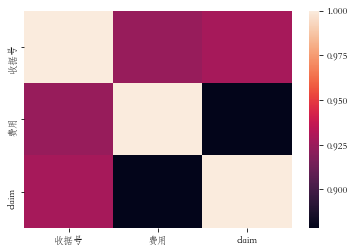

In [154]:
sns.heatmap(df.corr())

## 查找唯一值的个数

In [81]:
s.nunique()

5

In [82]:
s.nunique(dropna=False)  # 唯一值的数量, 把None也算作一个值

5

## groupby

内置聚合函数：
* mean()
* max()
* min()
* count()  # count只是单纯的计数，而不会管是否有重复值
* quantile(0.9)

自定义聚合函数：
```
def peak_to_peak(arr):
    return arr.max() - arr.min()
```

In [41]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})

In [159]:
df.groupby('收据号')['费用'].sum()

收据号
1     3
2     3
3    15
Name: 费用, dtype: int64

### 自定义聚合函数

In [163]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [164]:
df.groupby('收据号')['费用'].agg(peak_to_peak)

收据号
1    1
2    0
3    2
Name: 费用, dtype: int64

### 多个列应用相同的聚合函数

In [160]:
df.groupby('收据号')['费用', 'claim'].sum()

,费用,claim
收据号,,
1,3,8
2,3,4
3,15,15


### 一个列应用多个聚合函数

In [165]:
df.groupby('收据号')['费用'].agg(['sum', 'mean', 'max', peak_to_peak])

,sum,mean,max,peak_to_peak
收据号,,,,
1,3,1.5,2,1
2,3,3.0,3,0
3,15,5.0,6,2


### 多个列应用多个聚合函数

In [44]:
gg = df.groupby('收据号')[['费用', 'claim']].agg(['sum', 'mean', 'max'])
gg

费用          claim         
    sum mean max   sum mean max
收据号                            
1     3  1.5   2     8    4   4
2     3  3.0   3     4    4   4
3    15  5.0   6    15    5   5

In [45]:
gg[('费用', 'sum')]

收据号
1     3
2     3
3    15
Name: (费用, sum), dtype: int64

## expanding

In [1]:
import pandas as pd

In [4]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [3]:
s.expanding(2).sum()

0     NaN
1     1.0
2     3.0
3     6.0
4    10.0
dtype: float64

In [5]:
df = pd.DataFrame({'a': range(5), 'b': range(5, 10)})

In [6]:
df

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [7]:
df.expanding(3).sum()

,a,b
0,NaN,NaN
1,NaN,NaN
2,3.0,18.0
3,6.0,26.0
4,10.0,35.0


In [8]:
def t(s):
    print(s)
    return s.mean()

In [9]:
df.expanding(3).agg(t)

0    0.0
1    1.0
2    2.0
dtype: float64
0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64
0    5.0
1    6.0
2    7.0
dtype: float64
0    5.0
1    6.0
2    7.0
3    8.0
dtype: float64
0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
dtype: float64


,a,b
0,NaN,NaN
1,NaN,NaN
2,1.0,6.0
3,1.5,6.5
4,2.0,7.0


In [61]:
df = pd.DataFrame({'id': list('helloworldabchaha'), 'policyid': list('helloworldabchahc')
                  })

In [62]:
df

,id,policyid
0,h,h
1,e,e
2,l,l
3,l,l
4,o,o
5,w,w
6,o,o
7,r,r
8,l,l
9,d,d


In [83]:
def tt1(s):
    print(s)
    ll=[]
    count=0
    for i in range(s.shape[0]):
        if s.iloc[i] not in s.iloc[:i].tolist():
            count += 1
        ll.append(count)
    s[:]=ll
    return s   
        

In [84]:
dfd.groupby('id')['policyid'].apply(tt1)

10    a
16    c
Name: a, dtype: object
11    b
Name: b, dtype: object
12    c
Name: c, dtype: object
9    d
Name: d, dtype: object
1    e
Name: e, dtype: object
0    h
Name: h, dtype: object
2    l
Name: l, dtype: object
4    o
Name: o, dtype: object
7    r
Name: r, dtype: object
5    w
Name: w, dtype: object


0     1
1     1
2     1
4     1
5     1
7     1
9     1
10    1
11    1
12    1
16    2
Name: policyid, dtype: int64

In [45]:
dfd.groupby('id').expanding()['policyid'].count()

id    
a   10    1.0
    16    2.0
b   11    1.0
c   12    1.0
d   9     1.0
e   1     1.0
h   0     1.0
l   2     1.0
o   4     1.0
r   7     1.0
w   5     1.0
Name: policyid, dtype: float64

In [43]:
dfd

,id,policyid
0,h,h
1,e,e
2,l,l
4,o,o
5,w,w
7,r,r
9,d,d
10,a,a
11,b,b
12,c,c


In [34]:
df['c']=1
dfg=df.groupby(['a','b']).count()

In [36]:
dfg['c']=1

In [39]:
dfg.reset_index()

,a,b,c
0,a,a,1
1,a,c,1
2,b,b,1
3,c,c,1
4,d,d,1
5,e,e,1
6,h,h,1
7,l,l,1
8,o,o,1
9,r,r,1


In [ ]:
dfg.group

In [37]:
dfg

c
a b   
a a  1
  c  1
b b  1
c c  1
d d  1
e e  1
h h  1
l l  1
o o  1
r r  1
w w  1

## 需求：统计每个位置上字母之前出现的次数

### 思路1：用expanding实现

In [128]:
def t(s):
#     print(s)
    s1 = s.iloc[:-1]
    a = s.iloc[-1]
    return s1[s1==a].shape[0]

expanding不支持字符串，只支持number，所以需要提前编号。。。

In [100]:
d = dict()
count = 0
for i in list('helloworldabchaha'):
    if i not in d:
        d[i] = count
        count += 1

In [101]:
df[['aa', 'bb']] = df.applymap(lambda x: d[x])

In [102]:
from time import time

In [103]:
start = time()
df[['aa1', 'bb1']] = df[['aa', 'bb']].expanding(2).agg(t).fillna(0)
time()-start

0.024432897567749023

In [81]:
df

,a,b,aa,bb,aa1,bb1
0,h,h,0,0,0.0,0.0
1,e,e,1,1,0.0,0.0
2,l,l,2,2,0.0,0.0
3,l,l,2,2,1.0,1.0
4,o,o,3,3,0.0,0.0
5,w,w,4,4,0.0,0.0
6,o,o,3,3,1.0,1.0
7,r,r,5,5,0.0,0.0
8,l,l,2,2,2.0,2.0
9,d,d,6,6,0.0,0.0


### groupby + expanding(推荐！！！）

In [131]:
df.groupby('a').expanding().count()

a    b
a             
a 10  1.0  1.0
  14  2.0  2.0
  16  3.0  3.0
b 11  1.0  1.0
c 12  1.0  1.0
d 9   1.0  1.0
e 1   1.0  1.0
h 0   1.0  1.0
  13  2.0  2.0
  15  3.0  3.0
l 2   1.0  1.0
  3   2.0  2.0
  8   3.0  3.0
o 4   1.0  1.0
  6   2.0  2.0
r 7   1.0  1.0
w 5   1.0  1.0

In [134]:
df['t'] = range(df.shape[0])

In [138]:
df.head()

,a,b,t
0,h,h,0
1,e,e,1
2,l,l,2
3,l,l,3
4,o,o,4


In [137]:
df.groupby('a')['t'].expanding().sum().reset_index()

,a,level_1,t
0,a,10,10.0
1,a,14,24.0
2,a,16,40.0
3,b,11,11.0
4,c,12,12.0
5,d,9,9.0
6,e,1,1.0
7,h,0,0.0
8,h,13,13.0
9,h,15,28.0


### 思路2：rank
可以看到，使用rank可以使得速度快6倍！！！

In [ ]:
df.rank(
    axis=0,
    method='average',
    numeric_only=None,
    na_option='keep',
    ascending=True,
    pct=False,
)

In [66]:
df = pd.DataFrame({'a': list('elloworldabchaha'), 'b': list('elloworldabchaha')
                  })

In [67]:
df.shape

(16, 2)

In [73]:
df.loc[df['a']=='a', 'b']

9     a
13    a
15    a
Name: b, dtype: object

In [68]:
df

,a,b
0,e,e
1,l,l
2,l,l
3,o,o
4,w,w
5,o,o
6,r,r
7,l,l
8,d,d
9,a,a


In [45]:
# 添加辅助列
df['t'] = [1, 2, 3, 4] * 4


In [46]:
from time import time

In [47]:
a = df.groupby('a')['t']

In [62]:
def t(s):
    s[s<=2]=0
    
    s[s>2]=1
    return s.cumsum()

In [62]:
# def t(s):
#     s
#     return s.cumsum()

In [65]:
df.groupby('a')['t'].apply(lambda s: s.nunique())

a
a    2
b    1
c    1
d    1
e    1
h    2
l    3
o    2
r    1
w    1
Name: t, dtype: int64

In [63]:
df.groupby('a')['t'].apply(t)

0     0
1     0
2     1
3     1
4     0
5     1
6     1
7     2
8     0
9     0
10    1
11    1
12    0
13    0
14    1
15    1
Name: t, dtype: int64

In [49]:
df

,a,b,t
0,e,e,1
1,l,l,2
2,l,l,3
3,o,o,4
4,w,w,1
5,o,o,2
6,r,r,3
7,l,l,4
8,d,d,1
9,a,a,2


### apply 最灵活+全能的解决方式！！！

In [60]:
df = pd.DataFrame({'a': list('elloworldabchaha'), 'b': list('elloworldbbchaha')
                  })

In [47]:
# 添加辅助列
df['t'] = [1, 2, 3, 4] * 4

In [49]:
def t(s):
    """
    相同的值排序相同
    """
    print(s)
    ss = s.value_counts().sort_index()
    
    ll = []
    for i in range(ss.shape[0]):
        ll += [len(ll)] * ss.iloc[i]
    s[:] = ll
    return s

In [56]:
df['t'] =1

In [48]:
df

,a,b,t
0,e,e,1
1,l,l,2
2,l,l,3
3,o,o,4
4,w,w,1
5,o,o,2
6,r,r,3
7,l,l,4
8,d,d,1
9,a,b,2


In [58]:
def t1(s):
    """
    相同的值排序相同
    """
    print(s)
    
    return len(set(s))

In [59]:
df.groupby(['a'])['t'].expanding().apply(t1)

[1.]
[1. 1.]
[1. 1. 1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1. 1.]
[1.]
[1. 1.]
[1. 1. 1.]
[1.]
[1. 1.]
[1.]
[1.]


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


a    
a  9     1.0
   13    1.0
   15    1.0
b  10    1.0
c  11    1.0
d  8     1.0
e  0     1.0
h  12    1.0
   14    1.0
l  1     1.0
   2     1.0
   7     1.0
o  3     1.0
   5     1.0
r  6     1.0
w  4     1.0
Name: t, dtype: float64

In [50]:
df.groupby(['a'])['b'].apply(t)

9     b
13    a
15    a
Name: a, dtype: object
10    b
Name: b, dtype: object
11    c
Name: c, dtype: object
8    d
Name: d, dtype: object
0    e
Name: e, dtype: object
12    h
14    h
Name: h, dtype: object
1    l
2    l
7    l
Name: l, dtype: object
3    o
5    o
Name: o, dtype: object
6    r
Name: r, dtype: object
4    w
Name: w, dtype: object


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    2
Name: b, dtype: int64

In [145]:
a.apply(t)

0     0
1     0
2     1
3     0
4     0
5     1
6     0
7     2
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    2
Name: t, dtype: int64

In [146]:
start = time()
df['aa1'] = df.groupby('a')['t'].apply(t)

df['bb1'] = df.groupby('b')['t'].rank(method='first') - 1
time()-start

0.04871678352355957

可以看到用rank还有一些问题，看3和5行！！！

In [147]:
df

,a,b,t,aa1,bb1
0,e,e,1,0,0.0
1,l,l,2,0,0.0
2,l,l,3,1,1.0
3,o,o,4,0,1.0
4,w,w,1,0,0.0
5,o,o,2,1,0.0
6,r,r,3,0,0.0
7,l,l,4,2,2.0
8,d,d,1,0,0.0
9,a,a,2,0,0.0


In [148]:
def t(s):
    """
    分组求累计和
    """
    return s.cumsum()

In [149]:
df.head()

,a,b,t,aa1,bb1
0,e,e,1,0,0.0
1,l,l,2,0,0.0
2,l,l,3,1,1.0
3,o,o,4,0,1.0
4,w,w,1,0,0.0


In [150]:
a.apply(t)

0     1
1     2
2     5
3     4
4     1
5     6
6     3
7     9
8     1
9     2
10    3
11    4
12    1
13    4
14    4
15    8
Name: t, dtype: int64

In [151]:
df['t_cumsum'] = a.apply(t)

In [152]:
df

,a,b,t,aa1,bb1,t_cumsum
0,e,e,1,0,0.0,1
1,l,l,2,0,0.0,2
2,l,l,3,1,1.0,5
3,o,o,4,0,1.0,4
4,w,w,1,0,0.0,1
5,o,o,2,1,0.0,6
6,r,r,3,0,0.0,3
7,l,l,4,2,2.0,9
8,d,d,1,0,0.0,1
9,a,a,2,0,0.0,2


In [66]:
df['tt'] = 0

In [67]:
df['tt'] = df[df.a != 'a'].groupby('a')['t'].rank(method='first') - 1

In [68]:
df['tt']

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
5     0.0
6     1.0
7     0.0
8     2.0
9     0.0
10    NaN
11    0.0
12    0.0
13    1.0
14    NaN
15    2.0
16    NaN
Name: tt, dtype: float64

## rooling窗口函数
参见时间序列_ops

In [ ]:
需求 统计近

In [26]:
df = pd.DataFrame({'a': list('helloworldabchaha'), 'a1': list('helloworldabchaha'), 'b': range(len(list('helloworldabchaha'))),
                  'time': pd.date_range(start='20191001', periods=len(list('helloworldabchaha')))})

In [25]:
pd.date_range(start='20191001', periods=5)

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.dtypes

a          object
a1         object
b           int64
time    period[D]
dtype: object

In [184]:
df['one_t']=1

In [186]:
df

,a,a1,b,time,one_t
0,h,h,0,2019-10-01,1
1,e,e,1,2019-10-02,1
2,l,l,2,2019-10-03,1
3,l,l,3,2019-10-04,1
4,o,o,4,2019-10-05,1
5,w,w,5,2019-10-06,1
6,o,o,6,2019-10-07,1
7,r,r,7,2019-10-08,1
8,l,l,8,2019-10-09,1
9,d,d,9,2019-10-10,1


In [185]:
df.groupby(['a','a1'])['one_t'].cumsum()

0     1
1     1
2     1
3     2
4     1
5     1
6     2
7     1
8     3
9     1
10    1
11    1
12    1
13    2
14    2
15    3
16    3
Name: one_t, dtype: int64

In [46]:
df = pd.DataFrame({'a': list('helloworldabchaha'), 'b': range(len(list('helloworldabchaha'))),
                  'time': pd.date_range(start='20191001', periods=len(list('helloworldabchaha')))})

dfw=pd.concat([df,df],ignore_index=True)

In [47]:
dfw.set_index('time', inplace=True)

dfw.sort_index(inplace=True)

dfw['t']=dfw.index

dfw

,a,b,t
time,,,
2019-10-01,h,0,2019-10-01
2019-10-01,h,0,2019-10-01
2019-10-02,e,1,2019-10-02
2019-10-02,e,1,2019-10-02
2019-10-03,l,2,2019-10-03
2019-10-03,l,2,2019-10-03
2019-10-04,l,3,2019-10-04
2019-10-04,l,3,2019-10-04
2019-10-05,o,4,2019-10-05


In [49]:
dft=dfw.groupby(['a'])['b'].rolling('3D').sum()
dft

a  time      
a  2019-10-11    10.0
   2019-10-11    20.0
   2019-10-15    14.0
   2019-10-15    28.0
   2019-10-17    44.0
   2019-10-17    60.0
b  2019-10-12    11.0
   2019-10-12    22.0
c  2019-10-13    12.0
   2019-10-13    24.0
d  2019-10-10     9.0
   2019-10-10    18.0
e  2019-10-02     1.0
   2019-10-02     2.0
h  2019-10-01     0.0
   2019-10-01     0.0
   2019-10-14    13.0
   2019-10-14    26.0
   2019-10-16    41.0
   2019-10-16    56.0
l  2019-10-03     2.0
   2019-10-03     4.0
   2019-10-04     7.0
   2019-10-04    10.0
   2019-10-09     8.0
   2019-10-09    16.0
o  2019-10-05     4.0
   2019-10-05     8.0
   2019-10-07    14.0
   2019-10-07    20.0
r  2019-10-08     7.0
   2019-10-08    14.0
w  2019-10-06     5.0
   2019-10-06    10.0
Name: b, dtype: float64

In [45]:
dft.reset_index(level=0).sort_index().groupby('a')['b'].rolling('3D').sum()

a  t         
a  2019-10-11    20.0
   2019-10-15    28.0
   2019-10-17    60.0
b  2019-10-12    22.0
c  2019-10-13    24.0
d  2019-10-10    18.0
e  2019-10-02     2.0
h  2019-10-01     0.0
   2019-10-14    26.0
   2019-10-16    56.0
l  2019-10-03     4.0
   2019-10-04    10.0
   2019-10-09    16.0
o  2019-10-05     8.0
   2019-10-07    20.0
r  2019-10-08    14.0
w  2019-10-06    10.0
Name: b, dtype: float64

### 近n日次数总和(假设每天都有值的情况)

In [182]:
dff = dfw.groupby(['a','t']).count()
dff

b
a t            
a 2019-10-11  2
  2019-10-15  2
  2019-10-17  2
b 2019-10-12  2
c 2019-10-13  2
d 2019-10-10  2
e 2019-10-02  2
h 2019-10-01  2
  2019-10-14  2
  2019-10-16  2
l 2019-10-03  2
  2019-10-04  2
  2019-10-09  2
o 2019-10-05  2
  2019-10-07  2
r 2019-10-08  2
w 2019-10-06  2

### 近n日数值总和

In [149]:
dff = dfw.groupby(['a','t']).sum()
dff

b
a t             
a 2019-10-11  20
  2019-10-15  28
  2019-10-17  32
b 2019-10-12  22
c 2019-10-13  24
d 2019-10-10  18
e 2019-10-02   2
h 2019-10-01   0
  2019-10-14  26
  2019-10-16  30
l 2019-10-03   4
  2019-10-04   6
  2019-10-09  16
o 2019-10-05   8
  2019-10-07  12
r 2019-10-08  14
w 2019-10-06  10

In [153]:
dff=dff.reset_index(level=0)

In [165]:
dffg=dff.groupby('a').rolling(2,min_periods=1)['b'].sum()

In [167]:
dffg

a  t         
a  2019-10-11    20.0
   2019-10-15    48.0
   2019-10-17    60.0
b  2019-10-12    22.0
c  2019-10-13    24.0
d  2019-10-10    18.0
e  2019-10-02     2.0
h  2019-10-01     0.0
   2019-10-14    26.0
   2019-10-16    56.0
l  2019-10-03     4.0
   2019-10-04    10.0
   2019-10-09    22.0
o  2019-10-05     8.0
   2019-10-07    20.0
r  2019-10-08    14.0
w  2019-10-06    10.0
Name: b, dtype: float64

In [166]:
pd.merge(dfw,dffg.reset_index(),left_on=['a','t'],right_on=['a','t'])

,a,b_x,t,b_y
0,h,0,2019-10-01,0.0
1,h,0,2019-10-01,0.0
2,e,1,2019-10-02,2.0
3,e,1,2019-10-02,2.0
4,l,2,2019-10-03,4.0
5,l,2,2019-10-03,4.0
6,l,3,2019-10-04,10.0
7,l,3,2019-10-04,10.0
8,o,4,2019-10-05,8.0
9,o,4,2019-10-05,8.0


In [160]:
dfw

,a,b,t
time,,,
2019-10-01,h,0,2019-10-01
2019-10-01,h,0,2019-10-01
2019-10-02,e,1,2019-10-02
2019-10-02,e,1,2019-10-02
2019-10-03,l,2,2019-10-03
2019-10-03,l,2,2019-10-03
2019-10-04,l,3,2019-10-04
2019-10-04,l,3,2019-10-04
2019-10-05,o,4,2019-10-05


In [ ]:
dfw.groupby()

In [122]:
aaa = dfw.groupby('a')['b'].sum()

In [123]:
aaa

a
a    80
b    22
c    24
d    18
e     2
h    56
l    26
o    20
r    14
w    10
Name: b, dtype: int64

In [136]:
dfw['b'].rolling(2).sum()

time
2019-10-01     NaN
2019-10-01     0.0
2019-10-02     1.0
2019-10-02     2.0
2019-10-03     3.0
2019-10-03     4.0
2019-10-04     5.0
2019-10-04     6.0
2019-10-05     7.0
2019-10-05     8.0
2019-10-06     9.0
2019-10-06    10.0
2019-10-07    11.0
2019-10-07    12.0
2019-10-08    13.0
2019-10-08    14.0
2019-10-09    15.0
2019-10-09    16.0
2019-10-10    17.0
2019-10-10    18.0
2019-10-11    19.0
2019-10-11    20.0
2019-10-12    21.0
2019-10-12    22.0
2019-10-13    23.0
2019-10-13    24.0
2019-10-14    25.0
2019-10-14    26.0
2019-10-15    27.0
2019-10-15    28.0
2019-10-16    29.0
2019-10-16    30.0
2019-10-17    31.0
2019-10-17    32.0
Freq: D, Name: b, dtype: float64

In [32]:
dfw['b'].rolling('2D').sum()

time
2019-10-01     0.0
2019-10-01     0.0
2019-10-02     1.0
2019-10-02     2.0
2019-10-03     4.0
2019-10-03     6.0
2019-10-04     7.0
2019-10-04    10.0
2019-10-05    10.0
2019-10-05    14.0
2019-10-06    13.0
2019-10-06    18.0
2019-10-07    16.0
2019-10-07    22.0
2019-10-08    19.0
2019-10-08    26.0
2019-10-09    22.0
2019-10-09    30.0
2019-10-10    25.0
2019-10-10    34.0
2019-10-11    28.0
2019-10-11    38.0
2019-10-12    31.0
2019-10-12    42.0
2019-10-13    34.0
2019-10-13    46.0
2019-10-14    37.0
2019-10-14    50.0
2019-10-15    40.0
2019-10-15    54.0
2019-10-16    43.0
2019-10-16    58.0
2019-10-17    46.0
2019-10-17    62.0
Name: b, dtype: float64

In [128]:
aaa = dfw.groupby('a')['b'].rolling('1D').sum()

AttributeError: 'RollingGroupby' object has no attribute 'cumsum'

In [127]:
aaa

a  time      
a  2019-10-11    10.0
   2019-10-11    20.0
   2019-10-15    34.0
   2019-10-15    48.0
   2019-10-17    64.0
   2019-10-17    80.0
b  2019-10-12    11.0
   2019-10-12    22.0
c  2019-10-13    12.0
   2019-10-13    24.0
d  2019-10-10     9.0
   2019-10-10    18.0
e  2019-10-02     1.0
   2019-10-02     2.0
h  2019-10-01     0.0
   2019-10-01     0.0
   2019-10-14    13.0
   2019-10-14    26.0
   2019-10-16    41.0
   2019-10-16    56.0
l  2019-10-03     2.0
   2019-10-03     4.0
   2019-10-04     7.0
   2019-10-04    10.0
   2019-10-09    18.0
   2019-10-09    26.0
o  2019-10-05     4.0
   2019-10-05     8.0
   2019-10-07    14.0
   2019-10-07    20.0
r  2019-10-08     7.0
   2019-10-08    14.0
w  2019-10-06     5.0
   2019-10-06    10.0
Name: b, dtype: float64

In [118]:
aaa.unstack('a')

ValueError: Index contains duplicate entries, cannot reshape

In [112]:
dfw['r']=dfw.groupby('a')['b'].rolling('5d').sum()

ValueError: cannot handle a non-unique multi-index!

In [98]:
def t(df):
    print(df)
    dfc=df.copy()
    dfc['r']=0
    for line in df.itertuples():
        date_range = pd.period_range(end=line.time, periods=5)
        dfc.loc[line[0],'r']=dfc.loc[df.lineme.isin(date_range), 'b'].sum()
    print(dfc)
    return dfc['r']

In [99]:
df.groupby('a')['b','time'].apply(t)

     b        time
10  10  2019-10-11
14  14  2019-10-15
16  16  2019-10-17
     b        time
10  10  2019-10-11
14  14  2019-10-15
16  16  2019-10-17
     b        time
10  10  2019-10-11
14  14  2019-10-15
16  16  2019-10-17
     b        time
10  10  2019-10-11
14  14  2019-10-15
16  16  2019-10-17


AttributeError: 'DataFrame' object has no attribute 'lineme'

# 数据处理

## 缺失值处理

In [96]:
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [97]:
s.fillna('aaa')

0           1.1
1             2
2             3
3           aaa
4             4
5             5
6             4
7    2010-04-14
dtype: object

### 统计每个特征的缺失值个数

In [6]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
dtype: int64

### 删除全部为null的列

In [ ]:
df2.dropna(axis=1, how='all')

### 删除全部为null的行

In [ ]:
df2.dropna(axis=0, how='all')

## 强制类型转换

In [83]:
s = pd.Series([1.1, 2, 3, None, 4, 5, 4, '2010-04-14'])

In [84]:
s.map(str)

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [85]:
s.astype(str)

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [87]:
s.iloc[0]

1.1

In [86]:
s.astype(str).iloc[0]

'1.1'

In [88]:
s.iloc[3]

In [89]:
s.astype(str).iloc[3]

'None'

In [95]:
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [94]:
s.astype('category')

0           1.1
1             2
2             3
3           NaN
4             4
5             5
6             4
7    2010-04-14
dtype: category
Categories (6, object): [1.1, 2, 3, 4, 5, 2010-04-14]

In [90]:
7 in s  # 是否在s的index中

True

## map & apply & applymap
对Series中的每一个元素进行处理，map用的更多一些

In [ ]:
df2.apply(func, axis=0)  ## apply function to each column.
df2.applymap(func)  # Apply a function to a Dataframe elementwise.

In [91]:
s.apply('I am a {}'.format)

0           I am a 1.1
1             I am a 2
2             I am a 3
3          I am a None
4             I am a 4
5             I am a 5
6             I am a 4
7    I am a 2010-04-14
dtype: object

In [92]:
s.map('I am a {}'.format)

0           I am a 1.1
1             I am a 2
2             I am a 3
3          I am a None
4             I am a 4
5             I am a 5
6             I am a 4
7    I am a 2010-04-14
dtype: object

In [93]:
s.map('I am a {}'.format, na_action='ignore')

0           I am a 1.1
1             I am a 2
2             I am a 3
3                 None
4             I am a 4
5             I am a 5
6             I am a 4
7    I am a 2010-04-14
dtype: object

## str
把 Series的每个元素看成一个list， 注意string可以看成是char list

然后运用string 和 list 的各种方法

In [10]:
s = pd.Series([1.1, 2, '2010-04-14', None, 4, 5, 4, '2010-04-14'])

In [11]:
s

0           1.1
1             2
2    2010-04-14
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

### len

In [12]:
s.str.len()

0     NaN
1     NaN
2    10.0
3     NaN
4     NaN
5     NaN
6     NaN
7    10.0
dtype: float64

In [100]:
s.astype(str).str.len()

0     3
1     1
2     1
3     4
4     1
5     1
6     1
7    10
dtype: int64

### get()

In [101]:
s.astype(str).str.get(0)  # 如果字符串，就去第一个字符，如果列表就取第一个元素

0    1
1    2
2    3
3    N
4    4
5    5
6    4
7    2
dtype: object

### capitalize

In [7]:
s.astype(str).str.capitalize()

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

### contains

In [8]:
s.astype(str).str.contains('4')

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7     True
dtype: bool

### strip

In [14]:
s.astype(str).str.strip()

0           1.1
1             2
2    2010-04-14
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

### replace

In [15]:
s.astype(str).str.replace('-', '/')

0           1.1
1             2
2    2010/04/14
3          None
4             4
5             5
6             4
7    2010/04/14
dtype: object

### upper

In [16]:
s.astype(str).str.upper()

0           1.1
1             2
2    2010-04-14
3          NONE
4             4
5             5
6             4
7    2010-04-14
dtype: object

### lower

In [17]:
s.astype(str).str.lower()

0           1.1
1             2
2    2010-04-14
3          none
4             4
5             5
6             4
7    2010-04-14
dtype: object

### split

In [18]:
s.astype(str).str.split('-')

0             [1.1]
1               [2]
2    [2010, 04, 14]
3            [None]
4               [4]
5               [5]
6               [4]
7    [2010, 04, 14]
dtype: object

In [20]:
s.astype(str).str.split('-').str.get(0)

0     1.1
1       2
2    2010
3    None
4       4
5       5
6       4
7    2010
dtype: object

### find

In [21]:
s.astype(str).str.find('4')

0   -1
1   -1
2    6
3   -1
4    0
5   -1
6    0
7    6
dtype: int64

## dt

In [116]:
s = pd.Series(pd.date_range('20130101', periods=6))
s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
5   2013-01-06
dtype: datetime64[ns]

In [120]:
s.day

AttributeError: 'Series' object has no attribute 'day'

In [119]:
s.dt.day

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [121]:
s.map(str).dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [122]:
s.dt.week

0    1
1    1
2    1
3    1
4    1
5    1
dtype: int64

In [123]:
s.dt.weekday

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [124]:
s.dt.month

0    1
1    1
2    1
3    1
4    1
5    1
dtype: int64

## pivot table透视表
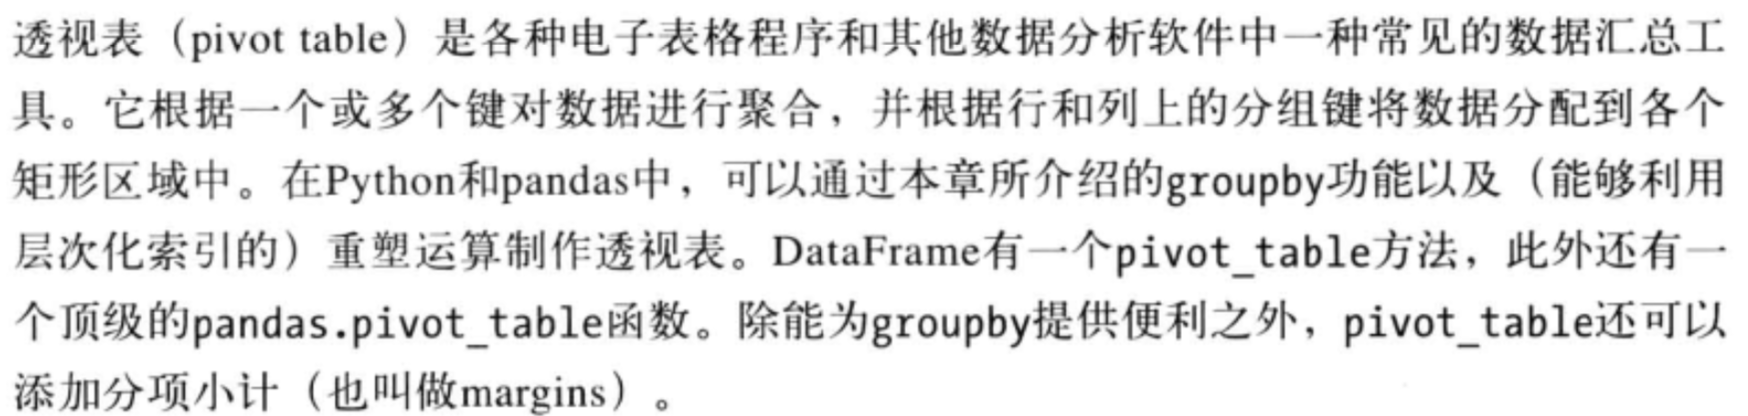

In [74]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})
df

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


In [148]:
# 不支持数据聚合
df.pivot(index='收据号', columns='项目名称', values='费用').fillna(0)

项目名称,床位费,挂号费,治疗费,药费
收据号,,,,
1,0.0,1.0,0.0,2.0
2,0.0,3.0,0.0,0.0
3,6.0,4.0,5.0,0.0


In [4]:
df.pivot_table(index='收据号', columns='项目名称', values='费用')

项目名称,床位费,挂号费,治疗费,药费
收据号,,,,
1,NaN,1.0,NaN,2.0
2,NaN,3.0,NaN,NaN
3,6.0,4.0,5.0,NaN


#### 试了一下，目前只有pivot_table支持MultiIndex

In [5]:
df.pivot_table(index=['收据号', 'claim'], columns='项目名称', values='费用')

,项目名称,床位费,挂号费,治疗费,药费
收据号,claim,,,,
1,4,NaN,1.0,NaN,2.0
2,4,NaN,3.0,NaN,NaN
3,5,6.0,4.0,5.0,NaN


## crosstab交叉表
交叉表是一种用于计算分组频率的特殊透视表

In [76]:
# 默认计算的是频率
pd.crosstab(df['收据号'], df['项目名称'])

项目名称,床位费,挂号费,治疗费,药费
收据号,,,,
1,0,1,0,1
2,0,1,0,0
3,1,1,1,0


In [176]:
pd.crosstab(df['收据号'], df['项目名称'], values=df['费用'], aggfunc=sum)

项目名称,床位费,挂号费,治疗费,药费
收据号,,,,
1,NaN,1.0,NaN,2.0
2,NaN,3.0,NaN,NaN
3,6.0,4.0,5.0,NaN


# plot

## Series

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

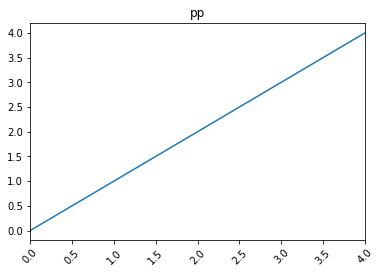

In [105]:
pd.Series(range(5)).plot(kind='line', title='pp', rot=45)

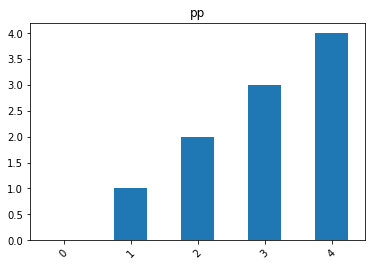

In [106]:
pd.Series(range(5)).plot(kind='bar', title='pp', rot=45)

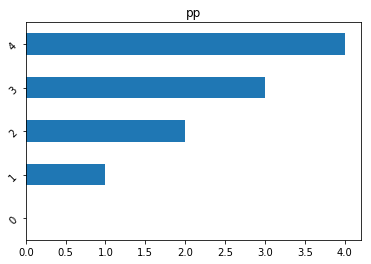

In [107]:
pd.Series(range(5)).plot(kind='barh', title='pp', rot=45)

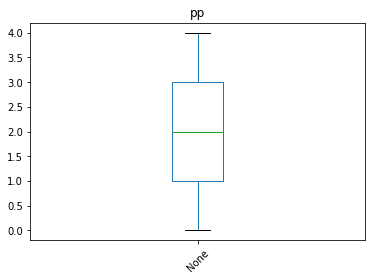

In [108]:
pd.Series(range(5)).plot(kind='box', title='pp', rot=45)

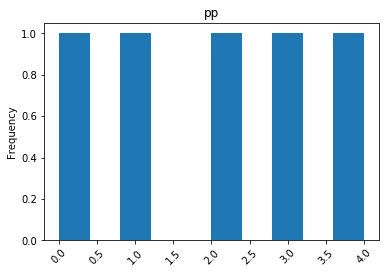

In [8]:
%matplotlib inline
pd.Series(range(5)).plot(kind='hist', title='pp', rot=45)

## DataFrame

In [50]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})
df

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


### line

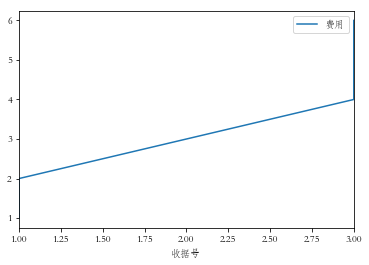

In [180]:
df.plot(kind='line', x='收据号', y='费用')

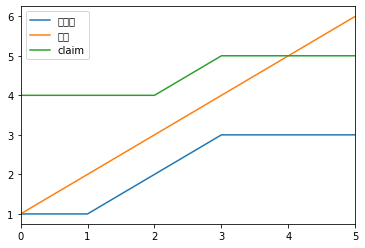

In [52]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12092deb8>,
      dtype=object)

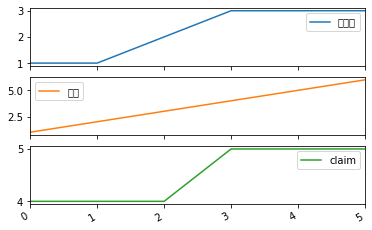

In [54]:
df.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120c6dd30>,
      dtype=object)

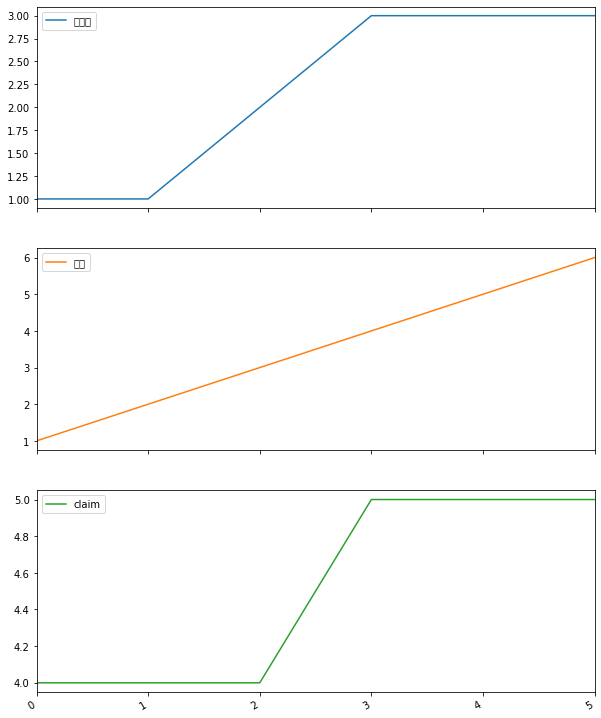

In [57]:
df.plot(subplots=True, sharex=True, figsize=(10, 14))  # 默认sharex=True

### scatter

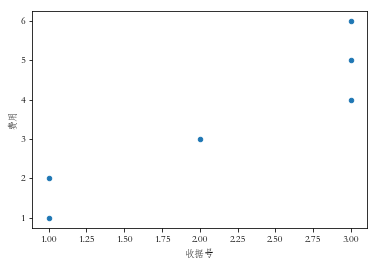

In [181]:
df.plot(kind='scatter', x='收据号', y='费用')

### bar

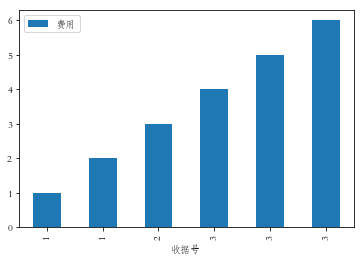

In [182]:
df.plot(kind='bar', x='收据号', y='费用')

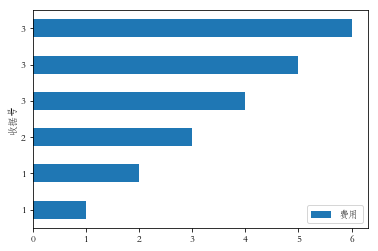

In [183]:
df.plot(kind='barh', x='收据号', y='费用')

### box

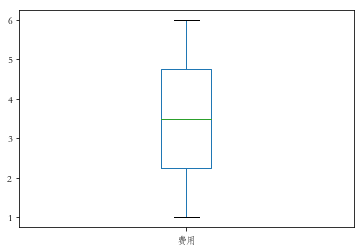

In [185]:
df.plot(kind='box', x='收据号', y='费用')

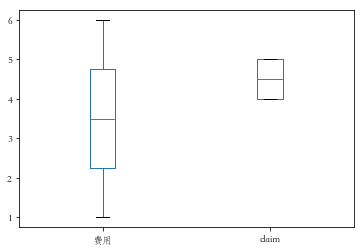

In [186]:
df.plot(kind='box', x='收据号')

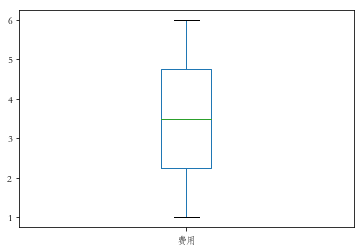

In [188]:
df.plot(kind='box', y='费用')

### hist

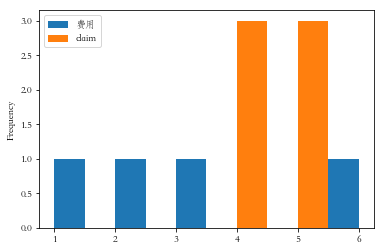

In [191]:
df.plot(kind='hist', x='收据号')

In [ ]:
df1 = pd